## Hoja de trabajo 02

Integrantes:
- Andrea Ximena Ramírez Recinos, 21874
- Adrián Ricardo Flores Trujillo, 21500
- Emily Elvia Melissa Pérez Alarcón, 21385


In [36]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
from matplotlib import pyplot as plt

# Clustering
import sklearn.cluster as cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import pyclustertend

# Data preprocessing
import sklearn.preprocessing

# Metrics for clustering evaluation
from sklearn.metrics import silhouette_score

In [37]:
# Read the data from the CSV file into a DataFrame and handle encoding issues if any.
df = pd.read_csv('Data/movies.csv', encoding='unicode_escape')

# Convert string values in numeric columns to numeric data types, replacing non-convertible values with NaN.
df[['castMenAmount', 'castWomenAmount']] = df[['castMenAmount', 'castWomenAmount']].apply(pd.to_numeric, errors='coerce')

# Replace excessively high values with NaN, as they are likely erroneous.
df[['castMenAmount', 'castWomenAmount']] = np.where(df[['castMenAmount', 'castWomenAmount']] > 1000, np.nan, df[['castMenAmount', 'castWomenAmount']])

# Display the DataFrame containing movie data.
df

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15.0,9.0
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3.0,9.0
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5.0,62.0
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5.0,18.0
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,920081,0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,...,16.662,2021-11-26,6.8,108,2,1,1,10,2.0,4.0
9996,920143,0,Comedy,NaN,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,0.0,97,False,...,491.706,2021-12-25,1.5,2,1,2,1,8,1.0,1.0
9997,922017,0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,...,565.658,2021-12-17,6.1,30,1,1,17,1,0.0,NaN
9998,922162,0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,...,9.664,2021-12-17,6.0,1,1,0,0,0,NaN,NaN


1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [38]:
# Select only numerical columns from the DataFrame as qualitative variables are not suitable for clustering.
# Drop the 'id' column as it does not provide significant information for clustering, leaving only numeric data.
df = df.select_dtypes(include=[np.number])
df = df.loc[:, df.columns != 'id'].dropna()
df

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,4257354.0,98,20.880,5.7,2077,2,2,1,25,15.0,9.0
1,21000000,12136938.0,110,9.596,6.5,223,3,3,2,15,3.0,9.0
2,11000000,775398007.0,121,100.003,8.2,16598,3,2,1,105,5.0,62.0
3,94000000,940335536.0,100,134.435,7.8,15928,2,1,1,24,5.0,18.0
4,55000000,677387716.0,142,58.751,8.5,22045,3,2,1,76,18.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,0.0,0,28.548,2.0,1,1,1,1,2,1.0,0.0
9992,0,0.0,77,153.156,7.5,22,2,3,2,9,4.0,2.0
9995,0,0.0,100,16.662,6.8,108,2,1,1,10,2.0,4.0
9996,0,0.0,97,491.706,1.5,2,1,2,1,8,1.0,1.0


In [39]:
# Since the dataset might be too large for computational resources, a sample of 1000 rows is taken for processing.
dfArray = np.array(df.sample(1000))

# Data normalization
# Scale the data to have zero mean and unit variance along each feature.
# This step is crucial for clustering algorithms as it ensures that each feature contributes equally to the distance calculations.
df_scale = sklearn.preprocessing.scale(dfArray)
df_scale

array([[-0.23039775, -0.01790418, -0.12537885, ..., -0.49255353,
        -0.55041003, -0.14972078],
       [-0.53276867, -0.3980454 ,  0.52944156, ..., -0.35976592,
        -0.19780911, -0.5905947 ],
       [-0.53276867, -0.3980454 , -0.58760501, ..., -0.31550338,
        -0.72671048,  0.29115314],
       ...,
       [-0.53276867, -0.3980454 , -0.89575579, ..., -0.49255353,
        -0.72671048,  0.02662878],
       [-0.53276867, -0.3980454 , -2.97577354, ..., -0.84665384,
        -0.90301094, -0.67876949],
       [-0.53276867, -0.3980454 , -0.31797308, ..., -0.66960369,
         0.1547918 , -0.85511905]])

2. Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Discuta sus resultados e impresiones.

In [40]:
# Calculate the Hopkins statistic to assess the clustering tendency of the data.
hopkinsValue = pyclustertend.hopkins(df_scale, len(df_scale))

# Determine if clustering is worthwhile based on the Hopkins statistic.
if hopkinsValue < 0.5:
    print(f"The Hopkins Value is {hopkinsValue:.3f}, indicating a strong tendency for clustering.")
    print("Clustering is worthwhile.")
else:
    print(f"The Hopkins Value is {hopkinsValue:.3f}, indicating little clustering tendency.")
    print("Clustering may not be meaningful for this dataset.")

The Hopkins Value is 0.127, indicating a strong tendency for clustering.
Clustering is worthwhile.


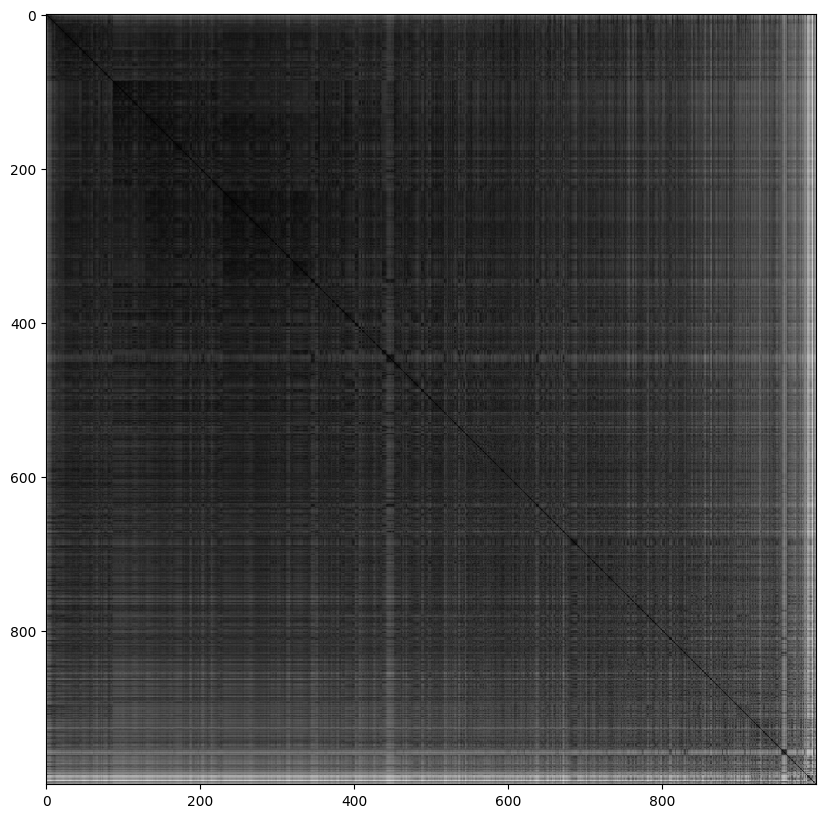

In [41]:
# Visual Assessment of Tendency (VAT) analysis.
# This visualization helps to identify potential clustering structures in the data.
# In the generated VAT plot, 2 distinct clusters or groups may be observed.
pyclustertend.vat(df_scale)

Tanto el análisis de Validación de la Tendencia Automática (VAT) como el estadístico de Hopkins validan la formación de clústeres en este conjunto de datos. El valor del estadístico de Hopkins, que se sitúa significativamente lejos de 0.5 (aproximadamente en el rango de 0.07-0.09), justifica la realización de un análisis de clustering. Por su parte, en el análisis visual proporcionado por el VAT, se logran distinguir entre dos y tres grupos distintos.

3. Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.

In [42]:
# List to store the sum of square distances between the centroids and each point.
wcss = []
n_clusters = range(1, 11)
for i in n_clusters: 
    # Initialize KMeans clustering with 'k-means++' initialization method and a fixed random state for reproducibility.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # Fit the KMeans model to the data.
    kmeans.fit(df)
    # Append the inertia to the list.
    wcss.append(kmeans.inertia_)

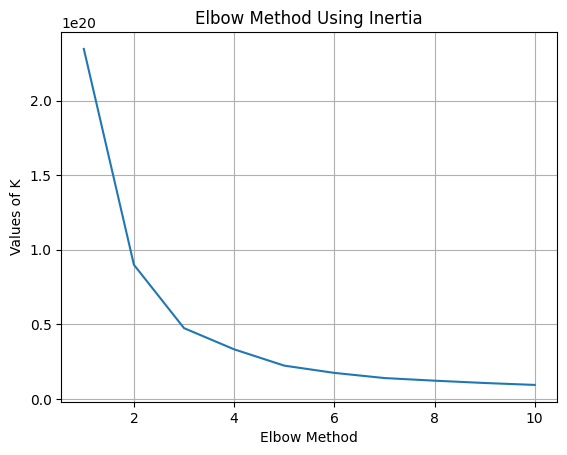

In [43]:
plt.plot(n_clusters, wcss)
plt.xlabel("Elbow Method")
plt.ylabel("Values of K")
plt.title("Elbow Method Using Inertia")
plt.grid()
plt.show()

En la gráfica presentada anteriormente, que fue generada a partir de la implementación del método del codo utilizando inercia, se puede inferir que la cantidad óptima de clústeres a formar en este conjunto de datos es 2. Este resultado valida lo que previamente se había deducido utilizando el método de Visualización de la Tendencia Automática (VAT).

4. Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno.

In [44]:
# Applying K-Means algorithm

#  n_clusters: Number of clusters to form.
#  fit: Compute k-means clustering.
#  df_scale: Input data, which is preprocessed and scaled.
kMean = cluster.KMeans(n_clusters=2).fit(df_scale)

# Printing the K-Means model
print(kMean)

KMeans(n_clusters=2)


In [45]:
# Getting cluster centroids
centroids = kMean.cluster_centers_

# Printing the centroids
print(centroids)

[[-0.30834417 -0.27903257 -0.18938457 -0.05071212 -0.07079739 -0.28763384
  -0.07796592 -0.10843988 -0.06545788 -0.33407044 -0.27000206 -0.31550259]
 [ 1.24112404  1.12314113  0.7622967   0.20412263  0.28496839  1.15776235
   0.31382262  0.43648416  0.2634762   1.34467547  1.08679221  1.26993755]]


In [46]:
movies = kMean.predict(df_scale)

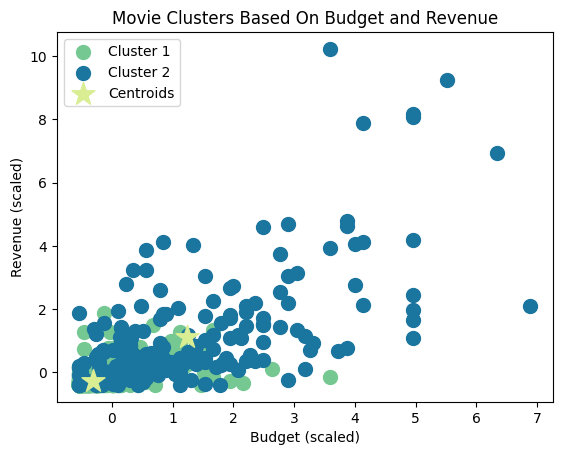

In [47]:
# Scatter plot for points in Cluster 1
plt.scatter(df_scale[movies == 0, 0], df_scale[movies == 0, 1], s=100, c='#76c893', label="Cluster 1")

# Scatter plot for points in Cluster 2
plt.scatter(df_scale[movies == 1, 0], df_scale[movies == 1, 1], s=100, c='#1a759f', label="Cluster 2")

# Scatter plot for centroids
plt.scatter(kMean.cluster_centers_[:, 0], kMean.cluster_centers_[:, 1], s=300, c="#d9ed92", marker="*", label="Centroids")

# Plot title and labels
plt.title("Movie Clusters Based On Budget and Revenue")
plt.xlabel("Budget (scaled)")
plt.ylabel("Revenue (scaled)")
plt.legend()

# Display the plot
plt.show()

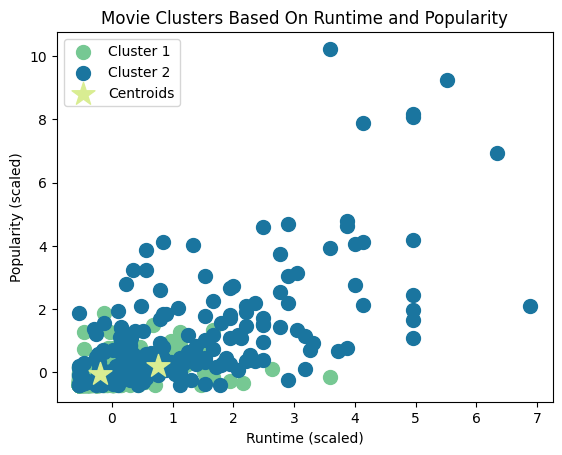

In [48]:
# Scatter plot for points in Cluster 1
plt.scatter(df_scale[movies == 0, 0], df_scale[movies == 0, 1], s=100, c='#76c893', label="Cluster 1")

# Scatter plot for points in Cluster 2
plt.scatter(df_scale[movies == 1, 0], df_scale[movies == 1, 1], s=100, c='#1a759f', label="Cluster 2")

# Scatter plot for centroids
plt.scatter(kMean.cluster_centers_[:, 2], kMean.cluster_centers_[:, 3], s=300, c="#d9ed92", marker="*", label="Centroids")

# Plot title and labels
plt.title("Movie Clusters Based On Runtime and Popularity")
plt.xlabel("Runtime (scaled)")
plt.ylabel("Popularity (scaled)")
plt.legend()

# Display the plot
plt.show()

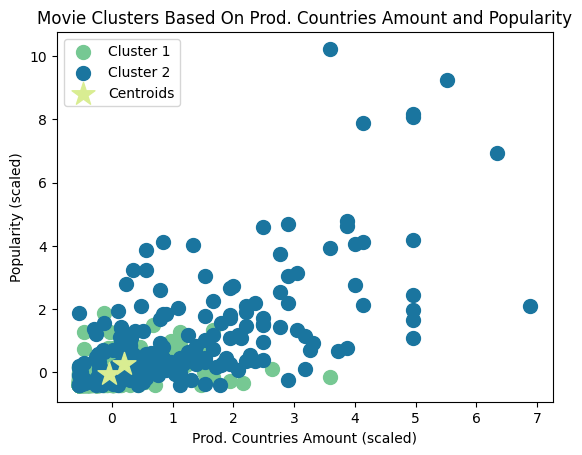

In [49]:
# Scatter plot for points in Cluster 1
plt.scatter(df_scale[movies == 0, 0], df_scale[movies == 0, 1], s=100, c='#76c893', label="Cluster 1")

# Scatter plot for points in Cluster 2
plt.scatter(df_scale[movies == 1, 0], df_scale[movies == 1, 1], s=100, c='#1a759f', label="Cluster 2")

# Scatter plot for centroids
plt.scatter(kMean.cluster_centers_[:, 3], kMean.cluster_centers_[:, 8], s=300, c="#d9ed92", marker="*", label="Centroids")

# Plot title and labels
plt.title("Movie Clusters Based On Prod. Countries Amount and Popularity")
plt.xlabel("Prod. Countries Amount (scaled)")
plt.ylabel("Popularity (scaled)")
plt.legend()

# Display the plot
plt.show()

### Hierarchical clustering

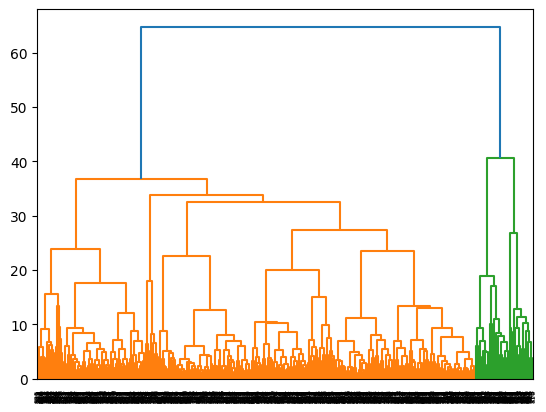

In [50]:
dendograma = sch.dendrogram(sch.linkage(df_scale, method='ward'))

In [51]:
hc = AgglomerativeClustering(n_clusters=2,linkage='ward')
moviesHC = hc.fit_predict(df_scale)

Analyzing Budget and Revenue Through Clustering

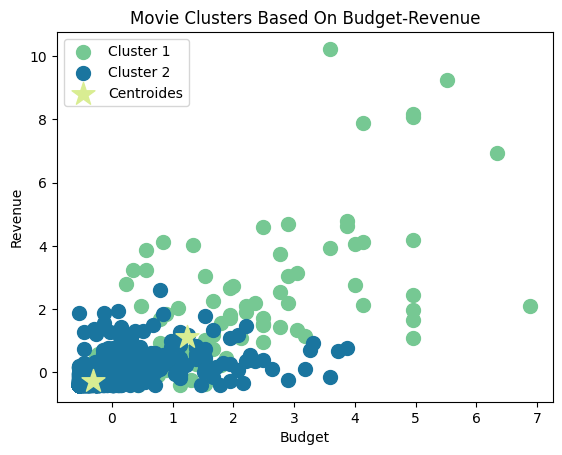

In [52]:
plt.scatter(df_scale[moviesHC == 0, 0], df_scale[moviesHC == 0, 1],s=100,c='#76c893', label = "Cluster 1")
plt.scatter(df_scale[moviesHC == 1, 0], df_scale[moviesHC == 1, 1],s=100,c='#1a759f', label = "Cluster 2")
plt.scatter(kMean.cluster_centers_[:,0],kMean.cluster_centers_[:,1], s=300, c="#d9ed92",marker="*", label="Centroides")

plt.title("Movie Clusters Based On Budget-Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.legend()

Analyzing Runtime and Popularity Through Clustering

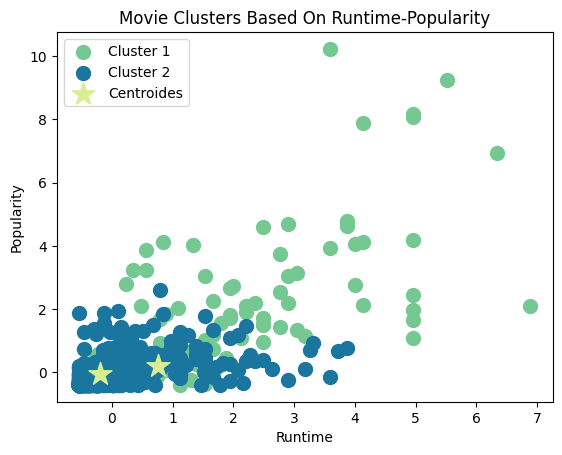

In [53]:
plt.scatter(df_scale[moviesHC == 0, 0], df_scale[moviesHC == 0, 1],s=100,c='#76c893', label = "Cluster 1")
plt.scatter(df_scale[moviesHC == 1, 0], df_scale[moviesHC == 1, 1],s=100,c='#1a759f', label = "Cluster 2")
plt.scatter(kMean.cluster_centers_[:,2],kMean.cluster_centers_[:,3], s=300, c="#d9ed92",marker="*", label="Centroides")

plt.title("Movie Clusters Based On Runtime-Popularity")
plt.xlabel("Runtime")
plt.ylabel("Popularity")
plt.legend()

Analyzing Popularity and Production Countries Amount Through Clustering

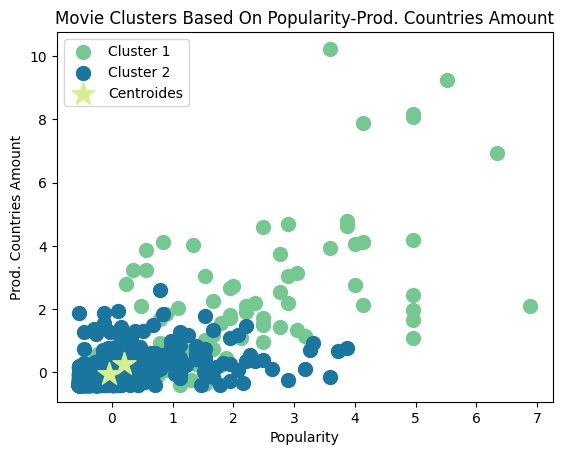

In [54]:
plt.scatter(df_scale[moviesHC == 0, 0], df_scale[moviesHC == 0, 1],s=100,c='#76c893', label = "Cluster 1")
plt.scatter(df_scale[moviesHC == 1, 0], df_scale[moviesHC == 1, 1],s=100,c='#1a759f', label = "Cluster 2")
plt.scatter(kMean.cluster_centers_[:,3],kMean.cluster_centers_[:,8], s=300, c="#d9ed92",marker="*", label="Centroides")

plt.title("Movie Clusters Based On Popularity-Prod. Countries Amount")
plt.xlabel("Popularity")
plt.ylabel("Prod. Countries Amount")
plt.legend()

Ambos métodos generan gráficos de dispersión similares para cada comparación entre dos variables. 

5. Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

In [55]:
rangeN = [2, 3, 4]

for n_clusters in rangeN:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scale)

    silhouette_avg = silhouette_score(df_scale, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3418845088021195
For n_clusters = 3 The average silhouette_score is : 0.23240010856309362
For n_clusters = 4 The average silhouette_score is : 0.2120744748359204


Se puede observar claramente en los resultados que el valor más cercano a 1 se obtiene cuando n_clusters=2. Esto sugiere que esta configuración proporciona la separación más óptima entre los datos. 

6. Interprete los grupos basado en el conocimiento que tiene de los datos. Recuerde investigar las medidas de tendencia central de las variables continuas y las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir.

### Hallazgos

1. Relación entre Presupuesto y Ganancias: A través del análisis de agrupamiento con dos clústeres distintos, emerge una clara tendencia que indica una correlación positiva entre los presupuestos de las películas y sus correspondientes ganancias, en donde las películas con mayores inversiones financieras tienden a generar mayores retornos. Esto coincide con la idea de que inversiones en producción, marketing y talento a menudo resultan en un mayor éxito comercial. Es importante mencionar con los hallazgos coinciden con aquellos obtenidos por medio del análisis exploratorio realizado previamente. 

2. Duración y Popularidad: Mientras que el análisis de agrupamiento revela una leve relación entre la duración y la popularidad de las películas, las diferencias pueden no ser estadísticamente significativas. Nuevamente, lo anteriormente mencionado se observó también en el análisis exploratorio. Para estas dos variables, es posible que no sea posible formar más de un grupo con este método, por lo que se recomienda intentar métodos diferentes o agrupar respecto a distintas variables para realizar hallazgos más relevantes.

3. Popularidad y Cantidad de Países de Producción: El análisis sugiere una relación mínima en la popularidad y el número de países de producción involucrados. Este hallazgo indica que factores más allá de la escala de producción, como estrategias de marketing, canales de distribución o resonancia cultural, pueden desempeñar un papel más significativo en determinar la popularidad de una película. De nuevo, es posible que no se pueda formar más de un grupo significativo con este método, por lo que se recomienda intentar con otros tipos de análisis o métodos de procesamiento de datos para poder realizar más hallazgos respecto a estas dos variables.

### Aplicaciones de los hallazgos

La información recopilada ofrece valiosos insights para las productoras cinematográficas que buscan maximizar el éxito comercial de sus películas. Por ejemplo, sugiere que una estrategia efectiva podría ser realizar una inversión más robusta en un inicio, tanto en producción como en campañas de marketing y  talento, con el fin de potenciar las ganancias. Asimismo, indica que la producción en múltiples países no necesariamente influye de manera significativa en la popularidad de la película, lo que abre la posibilidad de considerar opciones más eficientes, permitiendo así dirigir los recursos financieros hacia otros aspectos clave del proyecto.
Es posible que queden más hallazgos respecto a las variables categóricas de las películas, pero, con el método de agrupación, es difícil identificar patrones claros al haber pocos grupos resultantes con una gran cantidad de categorías posibles. Además, las entradas pueden tener múltiples variables cualitativas en un solo campo, por lo que se necesitarían conjuntos de datos más específicos y dedicados a esos aspectos para poder realizar hallazgos significativos basándose solamente en agrupación.

Enlace a la discusión de resultados: https://docs.google.com/document/d/14eCCvQ_C5yHVzzyvL_xo4VWLY_o9-9R3Mdc7et8q8JA/edit?usp=sharing